In [1]:
import sys

PACKAGE_PARENT = '../../../'
sys.path.append(PACKAGE_PARENT)

from alphaslime.agents.RL.policygrad.torch.ppo import PPOAgent
import ppo_training_configs as PPOCONFIGS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# load configurations
CONST = PPOCONFIGS.CONST
agent_config = PPOCONFIGS.agent_config
env = PPOCONFIGS.env

In [6]:
from alphaslime.evaluate.eval_agents import EvaluateGameSA

# create agent
agent_trained = PPOAgent(CONSTANTS=CONST, config=agent_config)

# load trained models
paths = ['tmp/ppo/actor_torch_ppo', 'tmp/ppo/critic_torch_ppo']
agent_trained.load_model(paths)


eps = 100
base_dir_path = "./"
RENDER = False
gym_evaluator = EvaluateGameSA(agent_trained, env, base_dir_path, render=RENDER)
# running_avg_len = 100
running_avg_len = 2


# evaulate agent
rewards, avg_rewards_array = gym_evaluator.evaluate(eps, is_progress_bar=True, running_avg_len=running_avg_len)




Actor Device used: cpu
Critic Device used: cpu


100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


average reward per episode : -2.0
average reward per episode= -2.0


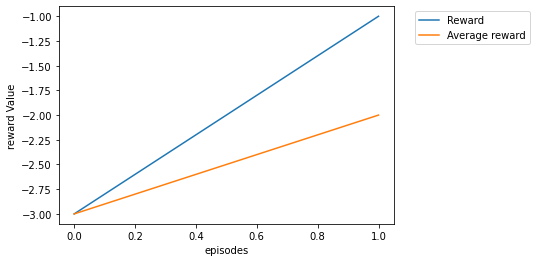

In [27]:
print("average reward per episode :", sum(rewards) / len(rewards))

import numpy as np
import matplotlib.pyplot as plt

rewards = np.array(rewards)
plt.plot(rewards, label='Reward')
plt.plot(avg_rewards_array, label='Average reward')
plt.legend(bbox_to_anchor=(1.05, 1)) 
plt.xlabel('episodes')
plt.ylabel('reward Value')
print('average reward per episode= {}'.format(np.mean(rewards)))
plt.show()